In [ ]:
from scipy.stats import ttest_1samp

In [1]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [5]:
import pandas as pd

In [7]:
df = pd.read_excel("iris_xlsx.xlsx")
X = df.loc[:, :"Petal.Width"]
# X = df.iloc[:, :-1]
X.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [9]:
kmeans = KMeans(n_clusters = 3) # max_iter, random_state
kmeans = kmeans.fit(X)

In [10]:
kmeans.labels_ # <-- 진짜 중요!!!

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
kmeans.cluster_centers_ # <-- 왕 중요!!

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
confusion_matrix(y_true=[1, 1, 1, 2, 3],
                 y_pred=[1, 2, 1, 2, 3])

array([[2, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [15]:
df["Species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [16]:
df["pred_class"] = kmeans.labels_
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  pred_class
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1

In [17]:
pd.crosstab(df["Species"], df["pred_class"])

pred_class   0   1   2
Species               
setosa       0  50   0
versicolor  48   0   2
virginica   14   0  36

In [19]:
df.groupby("pred_class").mean()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
pred_class                                                      
0               5.901613     2.748387      4.393548     1.433871
1               5.006000     3.428000      1.462000     0.246000
2               6.850000     3.073684      5.742105     2.071053

In [20]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [22]:
df = pd.read_excel("iris_xlsx.xlsx")
X = df.drop("Species", axis = 1) # <-- 특정 변수를 제거
X.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

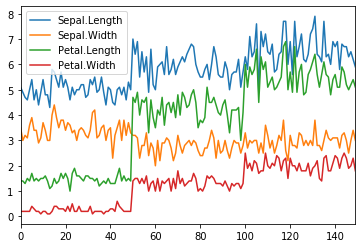

In [28]:
X.plot()

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [31]:
linked = linkage(X, "ward")

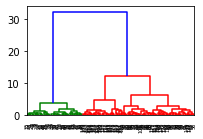

In [32]:
plt.figure(figsize=(3, 2))
dendrogram(linked)
plt.show()

In [34]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean",
                                  linkage="ward")
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [35]:
import statsmodels.formula.api as smf

In [36]:
df = pd.read_csv("linear_regression_01.csv")
df.head(2)

x  y
0  1  0
1  3  1

In [37]:
model = smf.ols("y ~ x", data = df)
result = model.fit()

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 27 Aug 2020   Prob (F-statistic):             0.0848
Time:                        13:20:29   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from statsmodels.formula.api import ols

In [44]:
ols("y ~ x", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 27 Aug 2020   Prob (F-statistic):             0.0848
Time:                        13:22:19   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ANOVA
# 종속변수: 수치형
# 독립변수: 명목형
formula = "yyyy ~ C(xxxx)"

In [ ]:
# 선형회귀
# 종속변수: 수치형
# 독립변수: 수치형

In [45]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [46]:
df_model = pd.concat([dia["carat"],
                      dia.loc[:, "depth":]],
                     axis = 1)
df_model.head(2)

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31

In [48]:
df_model = dia.drop(["cut", "color", "clarity"], axis = 1)
df_model.head(2)

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31

In [49]:
from statsmodels.formula.api import ols

In [55]:
model = ols("price ~ carat + depth + table + x + y + z", data = df_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:23   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
df_model.corr().round(2)

carat  depth  table  price     x     y     z
carat   1.00   0.03   0.18   0.92  0.98  0.95  0.95
depth   0.03   1.00  -0.30  -0.01 -0.03 -0.03  0.09
table   0.18  -0.30   1.00   0.13  0.20  0.18  0.15
price   0.92  -0.01   0.13   1.00  0.88  0.87  0.86
x       0.98  -0.03   0.20   0.88  1.00  0.97  0.97
y       0.95  -0.03   0.18   0.87  0.97  1.00  0.95
z       0.95   0.09   0.15   0.86  0.97  0.95  1.00

In [56]:
model = ols("price ~ carat", data = df_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:29   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
from sklearn.model_selection import train_test_split

In [62]:
train, test = train_test_split(df_model, test_size = 0.3, random_state = 123)
train.head(2)

carat  depth  table  price     x     y     z
13934   1.06   60.5   57.0   5669  6.63  6.60  4.00
38054   0.40   62.2   55.0   1012  4.75  4.77  2.96

In [ ]:
model = ols("price ~ carat", data = train).fit()
model.summary()

In [ ]:
pred = model.predict(test)
pred.head()

In [ ]:
test.loc[:, "pred"] = pred
test.head(2)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(y_true = test["price"],
                   y_pred = test["pred"]) ** 0.5 # RMSE

1549.1452107597029

In [ ]:
df_pred = pd.DataFrame({"carat": [3]})
model.predict(df_pred)

----------------------

#### dummy var. 알아보기

In [ ]:
dia_sub = dia.loc[:, ["price", "carat", "cut"]]
dia_sub.head(1)

In [86]:
dia_sub_dum = pd.get_dummies(dia_sub)
dia_sub_dum = pd.concat([dia_sub_dum, dia_sub["cut"]], axis = 1)
dia_sub_dum = dia_sub_dum.rename(columns = {"cut_Very Good": "cut_Very_Good"})

In [87]:
formula = "price ~ " + "+".join(dia_sub_dum.columns[1:])

In [85]:
model = ols(formula, data = dia_sub_dum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:41:03   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          6.67e+14   2.07e+15      0.323      0.747   -3.38e+15    4.72e+15
cut[T.Good]      -3.548e+14    1.1e+15     -0.323      0.747   -2.51e+15     1.8e+15
cut[T.Ideal]     -3.357e+14   1.04e+15     -0.323      0.747   -2.37e+15     1.7e+15
cut[T.Premium]     -3.2e+14   9.91e+14     -0.323      0.747   -2.26e+15    1.62e+15
cut[T.Very Good] -3.337e+14   1.03e+15     -0.323      0.747   -2.36e+15    1.69e+15
carat             7871.3200     13.999    562.275      0.000    7843.882    7898.758
cut_Fair          -6.67e+14   2.07e+15     -0.323      0.747   -4.72e+15    3.38e+15
cut_Good         -3.123e+14   9.67e+14     -0.323      0.747   -2.21e+15    1.58e+15
cut_Ideal        -3.314e+14   1.03e+15     -0.323      0.747   -2.34e+15    1.68e+15
cut_Premium      -3.471e+14   1.08e+15     -0.323      0.747   -2.45e+15    1.76e+15
cut_Very_Good    -3.334e+14   1.03e+15     -0.323      0.747   -2.36e+15    1.69e+15
==============================================================================
Omnibus:                    14613.107   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150990.123
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.945   Cond. No.                     4.49e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""